In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the train dataset
train_data = pd.read_csv("/Users/rohanshenoy/Downloads/train (5).csv")
train_data

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000
...,...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978,149500
1164,7,1472,2,402,384,802,2,7,1991,1992,160000
1165,5,789,1,250,789,789,1,5,1948,1950,115000
1166,6,1661,1,377,992,1661,1,8,1955,1996,165500


In [3]:

# Extract features and target variable
features = ['GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'OverallQual']
target = 'SalePrice'

In [4]:
# Normalize features using mean and standard deviation
train_data[features] = ((train_data[features] - train_data[features].mean()) / train_data[features].std()) * (1-0)

In [5]:
# Gradient descent function
def gradient_descent(x, y, m, c, learning_rate_m, learning_rate_c, num_iterations, tolerance=1e-4):
    n = len(y)  # Number of data points

    for _ in range(num_iterations):
        # Calculate the predicted values
        y_pred = np.dot(m, x) + c

        # Update m and c using the learning rates
        gradient_m = (2 / n) * np.dot(x, (y_pred - y))
        gradient_c = (2 / n) * np.sum(y_pred - y)

        m -= learning_rate_m * gradient_m
        c -= learning_rate_c * gradient_c

        # Calculate the cost function
        cost = np.mean((y_pred - y)**2)

        # Early stopping 
        #the early stopping mechanism prevents unnecessary iterations of the gradient descent 
        # this happends when the improvement in the cost function becomes very small
        #speeds up process of gradient descent
        #(suggested by chatgpt dont think it did much)
        if _ > 0 and abs(cost - prev_cost) < tolerance:
            break

        prev_cost = cost

    return m, c

In [6]:
# Initial guesses and hyperparameters
initial_m = np.zeros(len(features))
initial_c = 0.0
learning_rate_m = 0.00000028
learning_rate_c = 0.00000028
num_iterations = 1000

In [7]:
# Extract features as a matrix
X_train = train_data[features].values.T

In [8]:
# Gradient descent for each feature
m_values_train = []
for i, feature in enumerate(features):
    m, c = gradient_descent(X_train[i], train_data[target], initial_m[i], initial_c, learning_rate_m, learning_rate_c, num_iterations)
    m_values_train.append(m)
    
# Convert lists to NumPy arrays
m_values_train = np.array(m_values_train)

# Calculate the predicted values
predictions_train = np.dot(m_values_train, X_train) + initial_c


In [11]:
#read the test dataset
test_data = pd.read_csv("/Users/rohanshenoy/Downloads/test.csv")
test_data

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,8,1970,3,753,1085,1120,2,8,2006,2006,281000
1,6,1632,1,338,1240,1632,2,6,1958,1988,139000
2,7,1223,2,480,600,520,2,4,2005,2005,147400
3,5,1559,2,812,1559,1559,1,5,1948,1973,153500
4,4,630,1,286,630,630,1,3,1970,2002,86000
...,...,...,...,...,...,...,...,...,...,...,...
287,6,1158,2,576,1158,1158,1,5,2004,2004,158000
288,6,987,1,264,483,483,1,5,1972,2007,118000
289,6,848,2,420,848,848,1,4,2003,2003,140000
290,7,1266,2,388,1266,1266,2,6,2007,2007,159895


In [12]:
#normalize the features of the test dataset
test_data[features] = ((test_data[features] - train_data[features].mean()) / train_data[features].std()) * (1-0)

In [13]:

#PREDICT USING TRAINED MODEL ON THE TEST DATASET

# Extract features as a matrix for the test dataset
X_test = test_data[features].values.T

# Calculate the predicted values for the test dataset
#linear regression formula y= m1x1 + m2x2 + m3x3.....
predictions_test = np.dot(m_values_train, X_test) + initial_c



In [14]:

def accuracy(targets, prediction):
    residual_sum_square=np.sum((targets-prediction)**2)
    total_sum_square=np.sum((targets-np.mean(targets))**2)
    rsquared= 1-(residual_sum_square/total_sum_square)
    return rsquared


In [15]:
#using accuracy function to assess the models performance on test dataset

print(accuracy(test_data[target], predictions_test))

0.4373356841433472


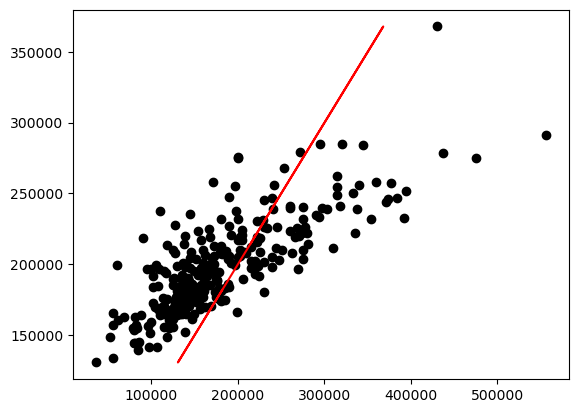

In [16]:
# Scatter plot
plt.scatter(test_data[target], predictions_test, color="black")

# Plot the regression line
plt.plot(predictions_test, predictions_test, color="red")

# Display the plot
plt.show()